# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement 
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.10.1'

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 


## Reading the Data into a DataFrame

In [3]:
# read the data and assign to variable
data = pd.read_csv('abtest.csv')

In [4]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
# Show first 5 rows of the dataframe
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
# Show last 5 rows of the dataframe
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
# Show how many columns and rows there are
df.shape

(100, 6)

In [8]:
# Identify each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
# Show info on qunatitative data 
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [10]:
# Show different values within column 
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [11]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [12]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [13]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [14]:
# See how many null values are in the dataset 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [15]:
# Check if there are any duplicates
duplicates_df = df[df.duplicated()]
print(duplicates_df)

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


### Univariate Analysis

#### User ID 

In [16]:
# Show how many unique values there are in the dataset 
df['user_id'].nunique()

100

#### Group  

In [17]:
# Check how many values are in the column 
df['group'].unique()

array(['control', 'treatment'], dtype=object)

In [18]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

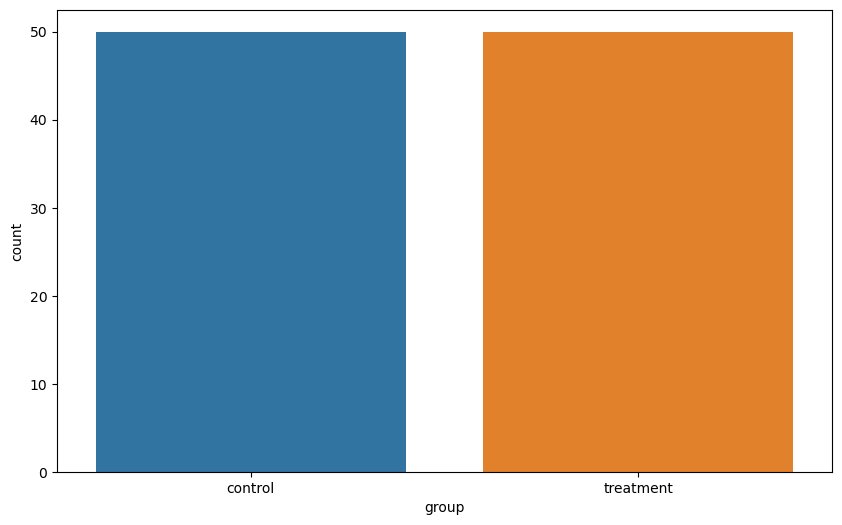

In [19]:
# Countplot is good to show categorical variables visually
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='group')
plt.show()

#### Landing Page  

In [20]:
df['landing_page'].unique()

array(['old', 'new'], dtype=object)

In [21]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

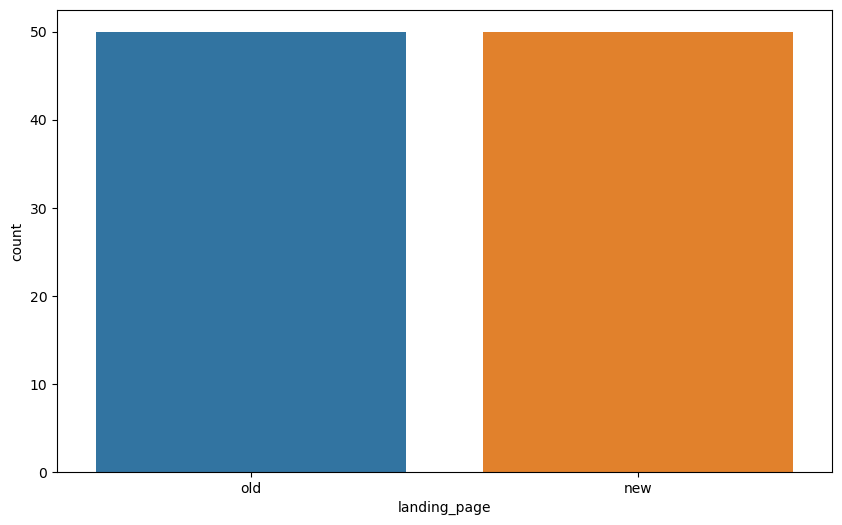

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='landing_page')
plt.show()

#### Time Spent on Page 

In [23]:
# Gather statistical data for Cost of Order with describe()
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

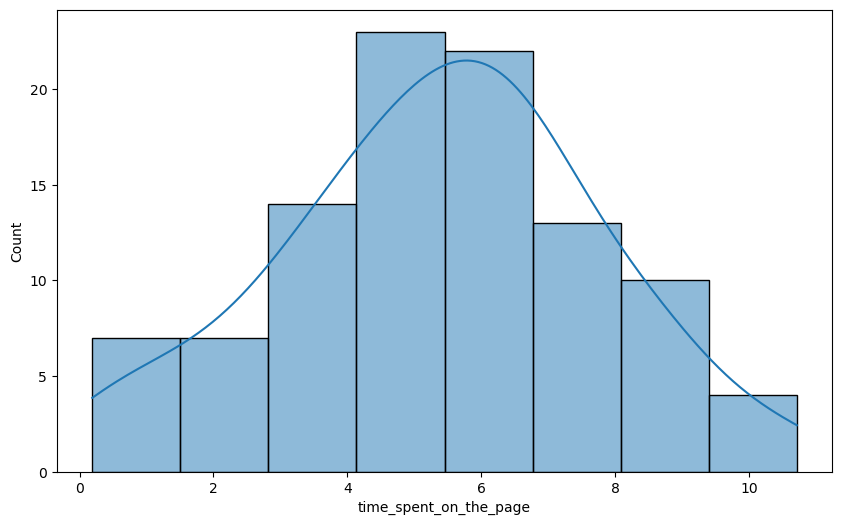

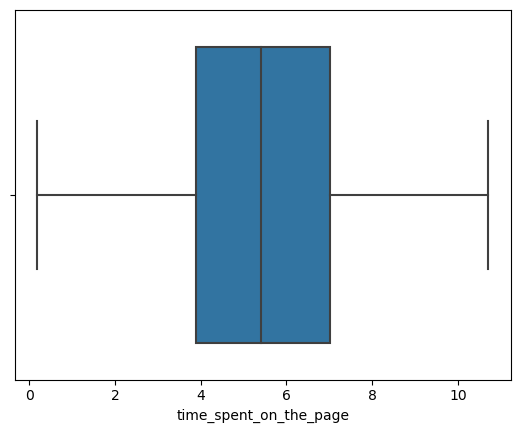

In [24]:
# Use a histogram to visually see the data
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()
# Use a boxplot to visually see the data
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Converted   

In [25]:
df['converted'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

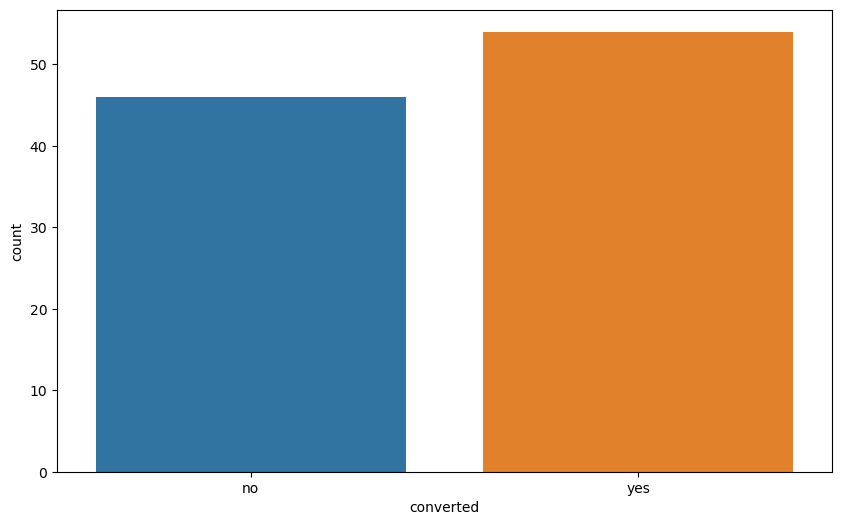

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='converted')
plt.show()

#### Language Preferred  

In [28]:
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [29]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

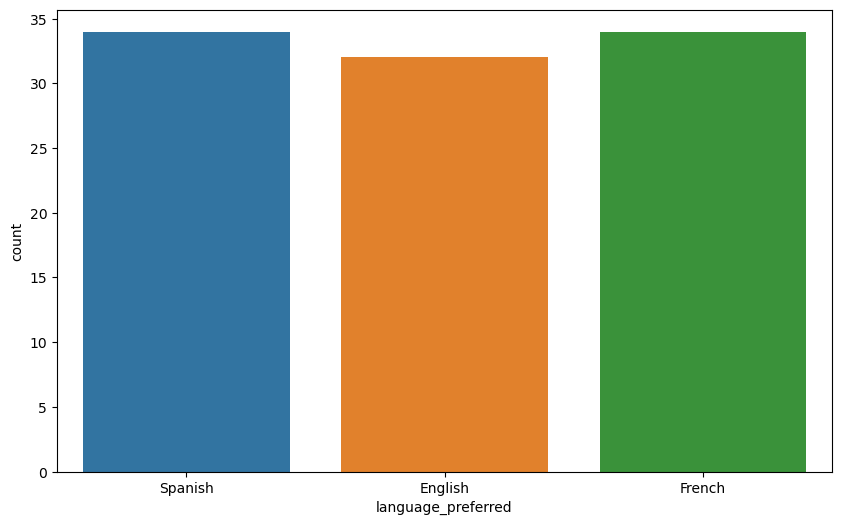

In [30]:
# countplot to visually see all languages together
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

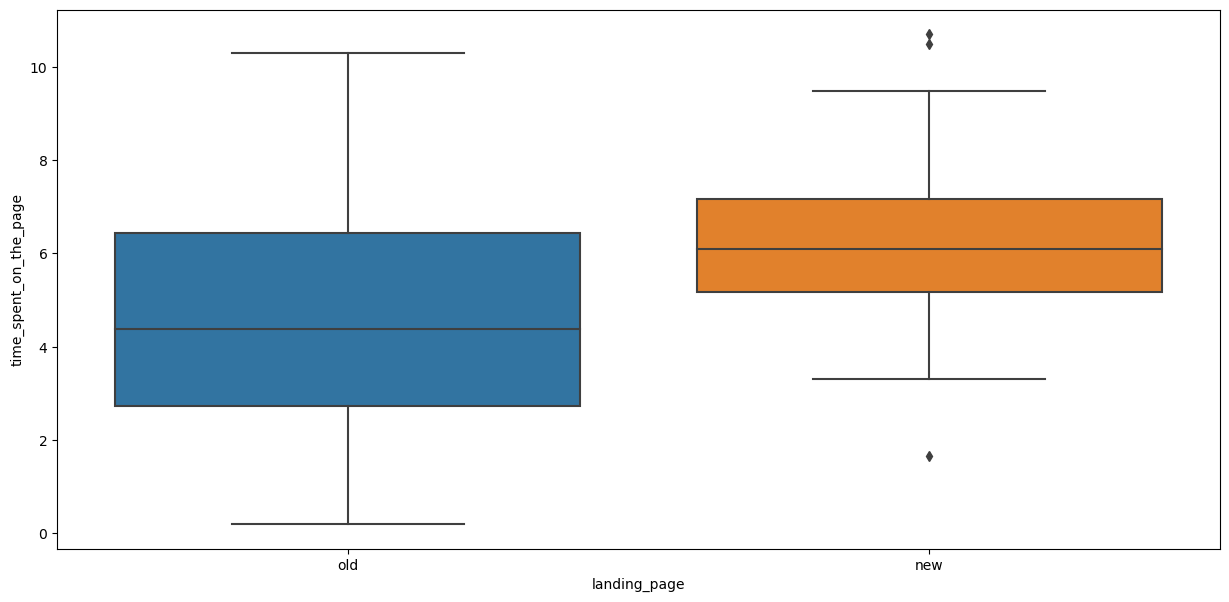

In [31]:
#Time spent on page vs Landing Page 
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = "landing_page", y = "time_spent_on_the_page")
plt.show()

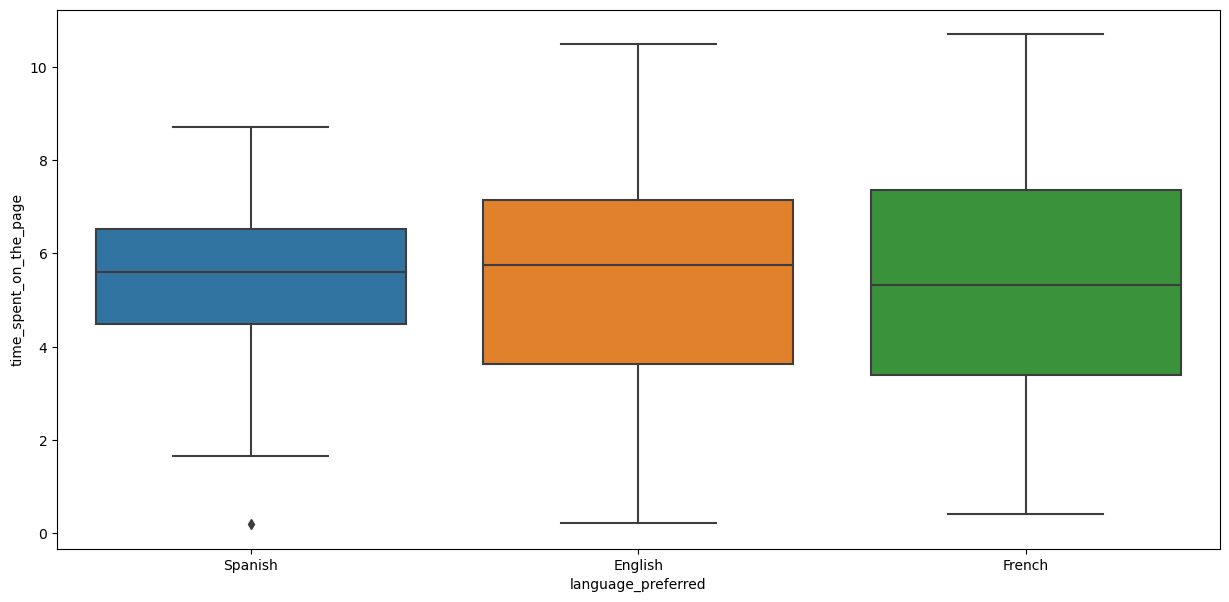

In [32]:
#Time spent on page vs Language Preferred
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = "language_preferred", y = "time_spent_on_the_page")
plt.show()

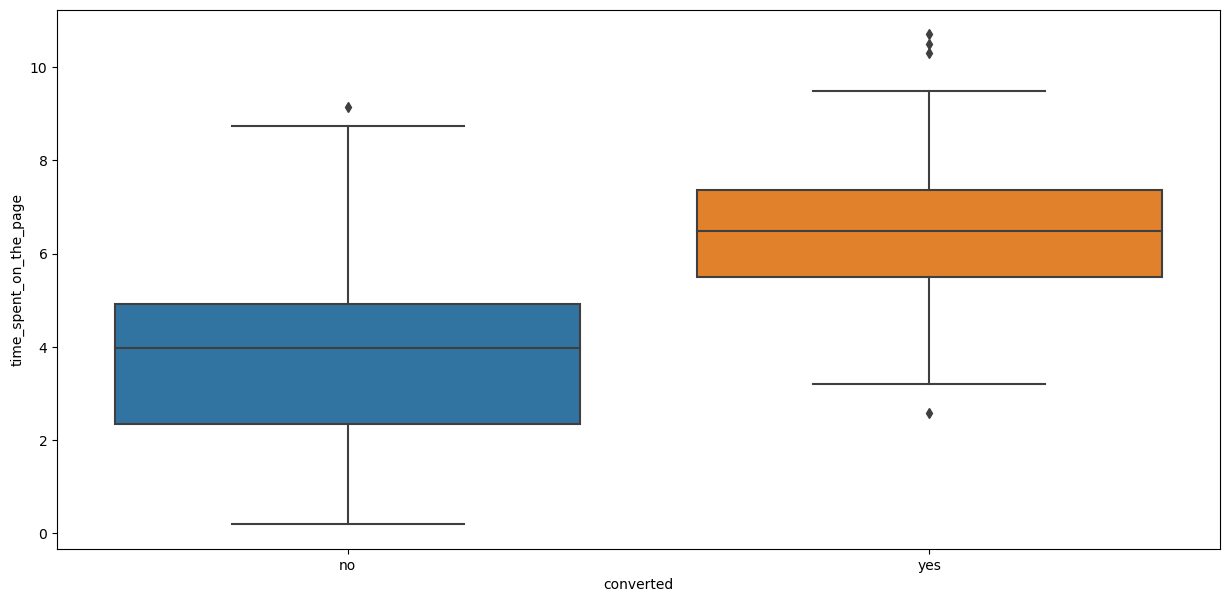

In [33]:
#Time spent on page vs Conversion 
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = "converted", y = "time_spent_on_the_page")
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

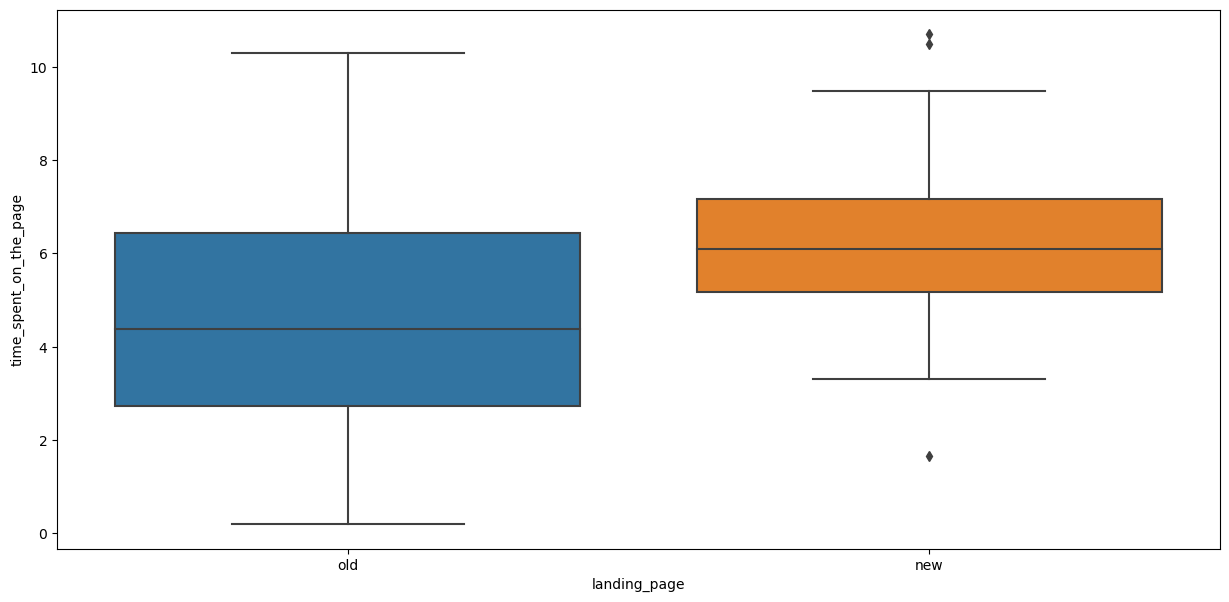

In [34]:
# Time spent on page vs Landing Page 
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x = "landing_page", y = "time_spent_on_the_page")
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean population of new and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

* Continuous data 
* Normally distributed populations
* Independent populations
* Unequal population standard deviations
* Random sampling from the population

We can use two sample T-test for this problem.

### Step 3: Decide the significance level

$\alpha$ = .05

### Step 4: Collect and prepare data

In [35]:
# find the sample means of old group 
df_old = df[df['landing_page'] == 'old']
old_mean = df_old['time_spent_on_the_page'].mean()
old_mean

4.532400000000001

In [36]:
# find the sample standard deviations of old group 
old_std = df_old['time_spent_on_the_page'].std()
old_std

2.581974849306046

In [37]:
# find the sample means of new group 
df_new = df[df['landing_page'] == 'new']
new_mean = df_new['time_spent_on_the_page'].mean()
new_mean

6.2232

In [38]:
# find the sample standard deviations of new group 
new_std = df_new['time_spent_on_the_page'].std()
new_std

1.8170310387878263

In [39]:
# print the sample means and sample standard deviations for the two samples
print('The mean time spent on page for old landing page is ' + str(old_mean))
print('The mean time spent on page for new landing page is ' + str(new_mean))
print('The standard deviation of time spent on page for old landing page is ' + str(old_std))
print('The standard deviation of time spent on page for new landing page is ' + str(new_std))

The mean time spent on page for old landing page is 4.532400000000001
The mean time spent on page for new landing page is 6.2232
The standard deviation of time spent on page for old landing page is 2.581974849306046
The standard deviation of time spent on page for new landing page is 1.8170310387878263


### Step 5: Calculate the p-value

In [40]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new['time_spent_on_the_page'],df_old['time_spent_on_the_page'], equal_var = False, alternative = 'greater') 
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

p-value = .000139

$\alpha$ = .05

p-value is less than the level of significance

### Step 7:  Draw inference

As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page than the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [41]:
# create crosstab to compare two columns in dataset
crosstab_1 = pd.crosstab(df['converted'], df['landing_page'])
crosstab_1

landing_page,new,old
converted,,
no,17,29
yes,33,21


In [42]:
# show converted count for old landing page
df_old_conv = df_old['converted']
df_old_conv.value_counts()

no     29
yes    21
Name: converted, dtype: int64

In [43]:
# show converted count for new landing page
df_new_conv = df_new['converted']
df_new_conv.value_counts()

yes    33
no     17
Name: converted, dtype: int64

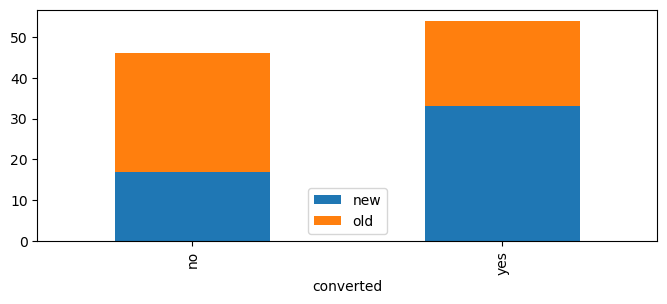

In [44]:
# plot the crosstab as a bar chart
crosstab_1.plot(kind="bar",figsize=(8,3),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $p_1,p_2$ be the proportions of conversions in new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

Two Proportioned Z-Test 

### Step 3: Decide the significance level

$\alpha$ = .05

### Step 4: Collect and prepare data

In [45]:
# calculate amount converted on old page 
df_old_conv = df_old['converted']
df_old_conv.value_counts()

no     29
yes    21
Name: converted, dtype: int64

In [46]:
# calculate amount converted on new page 
df_new_conv = df_new['converted']
df_new_conv.value_counts()

yes    33
no     17
Name: converted, dtype: int64

In [47]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

# total number of users in the control group
total_control = df.group.value_counts()['control']

# total number of users in the treatment group
total_treatment = df.group.value_counts()['treatment']

In [48]:
# print out the statements 
print('Total number of people in the control group is '+ str(total_control))
print('Total number of people in the treatment group is '+ str(total_treatment))
print('Total number of people in the control group converted is '+ str(old_converted))
print('Total number of people in the treatment group converted is '+ str(new_converted))

Total number of people in the control group is 50
Total number of people in the treatment group is 50
Total number of people in the control group converted is 21
Total number of people in the treatment group converted is 33


### Step 5: Calculate the p-value

In [49]:
# import the proportion z-test function
from statsmodels.stats.proportion import proportions_ztest  

# ztest code 
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [total_treatment, total_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

p-value = .008

$\alpha$ = .05

p-value is less than the level of significance

### Step 7:  Draw inference

As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [50]:
# use crosstab to compare two columns in the dataset
crosstab_2 = pd.crosstab(df['language_preferred'], df['converted'])
crosstab_2

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


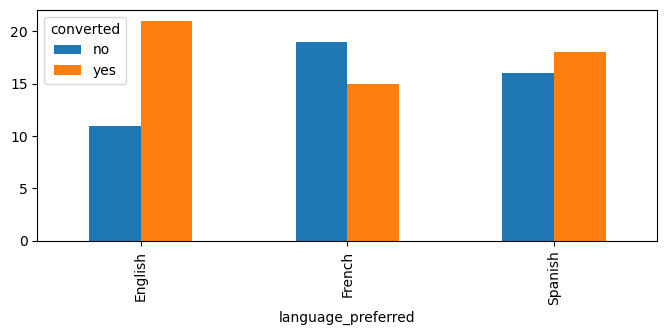

In [51]:
# plot the crosstab
crosstab_2.plot(kind="bar",figsize=(8,3))
plt.legend
plt.show()

### Step 1: Define the null and alternate hypotheses



We will test the null hypothesis

>$H_0:$ Language preference is independent of conversion rate.

against the alternate hypothesis

>$H_a:$ Language preference depends on conversion rate.

### Step 2: Select Appropriate test

Chi-Square Test for Independence 

### Step 3: Decide the significance level

$\alpha$ = .05

### Step 4: Collect and prepare data

In [52]:
# use crosstab to compare two columns in the dataset
crosstab_2 = pd.crosstab(df['language_preferred'], df['converted'])
crosstab_2

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [53]:
# import the required function
from scipy.stats import chi2_contingency

In [54]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(crosstab_2)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

p-value = .213

$\alpha$ = .05

p-value is greater than the level of significance

### Step 7:  Draw inference

As the p-value (~0.213) is greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that conversion rate is dependent on language preference at 5% significance level.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

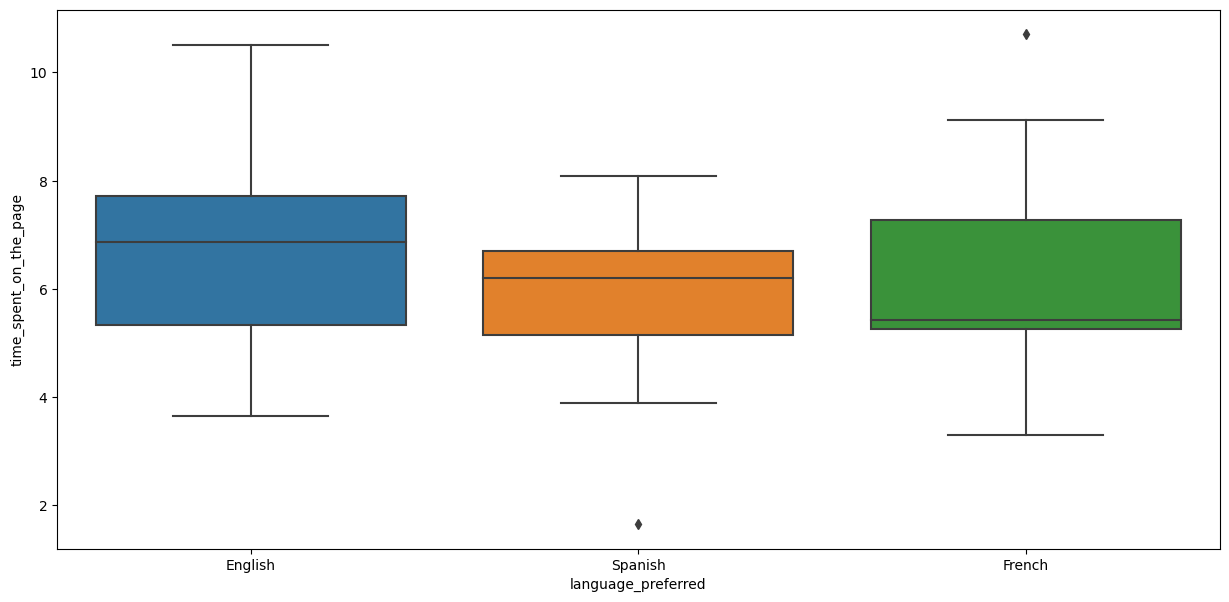

In [55]:
#Time spent on page vs Language Preferred
plt.figure(figsize=(15,7))
sns.boxplot(data=df_new, x = "language_preferred", y = "time_spent_on_the_page")
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on page for languages Spanish, English and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language preference time is different from the rest.


### Step 2: Select Appropriate test

One-way ANOVA Test

### Step 3: Decide the significance level

$\alpha$ = .05

### Step 4: Collect and prepare data

In [56]:
# gather total amounts in the new page
df_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [57]:
# use groupby to gather the means of all languages
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [58]:
# create a subsetted data frame of the time spent on the new page by Language users
time_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']  
time_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [59]:
# import f one way 
from scipy.stats import f_oneway

# calculate the p-value
test_stat, p_value = f_oneway(time_English, time_French, time_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

p-value = .432

$\alpha$ = .05

p-value is greater than the level of significance

### Step 7:  Draw inference

As the p-value (~0.432) is much greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one language preference has a different time from the rest at 5% significance level.

## Conclusion and Business Recommendations

### Conclusions

- The time spent on the page follows a normal distribution with a mean of 5.38 minutes.
- Overall, users spent more time on the new landing page, with an average of 6.22 minutes, compared to the old landing page's average of 4.53 minutes.
- Statistical evidence at a 5% significance level strongly supports the claim that users spend more time on the new landing page than the existing landing page.
- Out of 50 users, 33 were converted on the new landing page, while only 21 were converted on the old landing page.
- There is sufficient statistical evidence at a 5% significance level to assert that the conversion rate for the new page is higher than the conversion rate for the old page.
- The mean time spent on the page for all three language preferences was similar, with Spanish exhibiting the smallest variance compared to English and French.
- At a 5% significance level, we do not have enough statistical significance to conclude that the conversion rate is dependent on language preference.
- At a 5% significance level, we do not have enough statistical significance to conclude that at least one language preference has a different time from the rest.

### Recommendations

- The agency should implement the new landing page for the entire public, supported by ample evidence indicating increased user engagement and a higher conversion rate compared to the old landing page.
- Currently, there is no evidence suggesting variations in conversion rates and time spent based on language preference. The company should remain vigilant and monitor language preference trends for any emerging patterns.

___